Graph any 2 stats/ combination of stats! 
Key:
 BASIC STATS :           ADVANCED STATS:  
        Year = calyear;               PER = PER
        Player Name = Player          TS% = TS
        Position = Pos                3PAr = TPAr
        Age = Age                     FTr = FTr 
        Games Played = G              ORB% = ORBper
        Minutes Played = MP           DRB% = DRBper
        FGM = FG                      TRB% = TRBper
        FGA = FGA                     AST% = ASTper
        FG% = FG_perc                 STL% = STLper
        3PM = m_3P                    BLK% = BLKper
        3PA = a_3P                    TOV% = TOVper
        3P% = perc_3P                 USG% = USG
        2PM = m_2P                    OWS = OWS
        2PA = a_2P                    DWS = DWS
        2P% = perc_2P                 WS/48 = WS48
        eFG% = eFG                    OBPM = OBPM 
        FTM = FT                      DBPM = DPBM
        FTA = FTA                     BPM = BPM
       

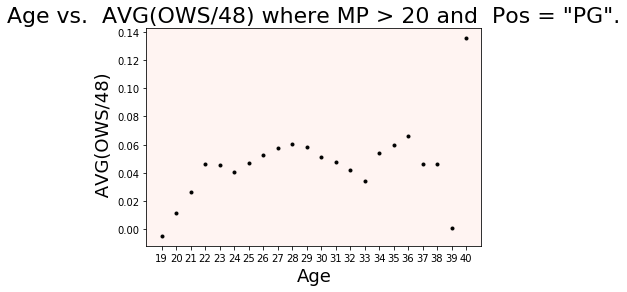

In [2]:
#SQL QUERIES used to connfigure the data further :
from createdb import *
from advanced_db import *
from matplotlib import pyplot as plt 
import numpy as np

#function combining all basic and advanced stats data
def combine_basic_and_adv():  
    with conn:
        cursor.execute("DROP TABLE if exists all_stats_reg_szn") #Can reset the table with this line 
        cursor.execute("""CREATE TABLE if not exists all_stats_reg_szn as SELECT * from all_basic_stats 
                inner join all_advanced_stats on all_basic_stats.calyear = all_advanced_stats.calyear 
                and all_basic_stats.Player = all_advanced_stats.Player""")
#combine_basic_and_adv()

#function that takes the first and second coloumns of the SQL query and returns plot 
def make_graph(xlabel, ylabel, title):
    players_list =cursor.fetchall()
    xvar =[]; yvar = []
    for row in players_list:
        xvar.append(row[0])
        yvar.append(row[1])
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.set_facecolor("xkcd:very light pink")
    plt.rcParams['figure.figsize'] = [11, 9]
    plt.plot (xvar, yvar, "k.")
    plt.xticks(np.arange(min(xvar), max(xvar)+1, 1.0))
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.title(title,fontsize = 22)
    plt.show()

def instructions():
    print("Graph any 2 stats/ combination of stats! ")
    print("Key:")
    print(""" BASIC STATS :           ADVANCED STATS:  
        Year = calyear;               PER = PER
        Player Name = Player          TS% = TS
        Position = Pos                3PAr = TPAr
        Age = Age                     FTr = FTr 
        Games Played = G              ORB% = ORBper
        Minutes Played = MP           DRB% = DRBper
        FGM = FG                      TRB% = TRBper
        FGA = FGA                     AST% = ASTper
        FG% = FG_perc                 STL% = STLper
        3PM = m_3P                    BLK% = BLKper
        3PA = a_3P                    TOV% = TOVper
        3P% = perc_3P                 USG% = USG
        2PM = m_2P                    OWS = OWS
        2PA = a_2P                    DWS = DWS
        2P% = perc_2P                 WS/48 = WS48
        eFG% = eFG                    OBPM = OBPM 
        FTM = FT                      DBPM = DPBM
        FTA = FTA                     BPM = BPM
        FT% = perc_FT                 VORP = VORP
        STL = STL                     ORB = ORB
        BLK = BLK                     DRB = DRB
        TOV = TOV                     TRB =TRB
        PF = PF                       AST= AST
        Points = Points""")
    
def prompt_user():#function to ask user to input bounds and conditions of the data to be graphed
    stat1, stat2 = input("Which 2 stats would you like to compare (seperate with comma)? ").split(',')
    con = list(input("Enter 0-5 conditions (seperate with comma) ").split(','))
    while len(con) < 5:
        con.append("")
    i = 1 
    while i < len(con):
        if con[i] != "":
            con[i] = " and "+ con[i] 
        i +=1
    if con[0] != "":
        con[0] =  "where "+ con[0]
    group_by = list(input("Group by (For nothing press Enter) ?").split())
    if len(group_by) != 0:
        group_by[0] = "group by {}".format(group_by[0])
    else: group_by = [""]
 
    order_by = str(input("Order by which stat?"))
    asc_or_desc = input("ascending or descending?")
    
    cursor.execute("""SELECT {}, {} from all_stats_reg_szn {}{}{}{}{} {} order by {} {}  """
    .format(stat1,stat2,con[0],con[1],con[2],con[3],con[4], group_by[0], order_by, asc_or_desc))
    conn.commit()
    make_graph(stat1, stat2, "{} vs. {} {}.".format(stat1, stat2, "{}{}{}{}{}".format(con[0],con[1],con[2],con[3],con[4])))

    
instructions()
prompt_user()



